In This homework You will take a data set and build a model from the data to predict the target and evaluate the preformance using cross validation and grid search. If you are building a classification model you should adress which measure of accuracy is important and incorperate that in your analysis. There are four datasets that have been provided. Information for each of them can be found here:

Climate failure (pop_failures_fixed.dat):

https://archive.ics.uci.edu/dataset/252/climate+model+simulation+crashes

Forest Fires (forestfires.csv)

https://archive.ics.uci.edu/dataset/162/forest+fires

Wine Quality (winequality-white.csv,whinequality-red.csv)

https://archive.ics.uci.edu/dataset/186/wine+quality

If you wnat to choose your own dataset you can use the following link:

https://archive.ics.uci.edu/datasets

You should first state the question you are trying to answer whith the model and then read in the data and make sure that the data is cleaned and ready for modeling. 

Next you may want to do some exploratory data analysis and convert and or scale any features you may want to use. You do not need to use all the fetures in the dataset, but you should have an explaination for any features that you drop.

Next build an appropriate model to answer your question. Determine how well your model can answer your question  using cross-validation and grid search.

Finally communicate your findings in a few paragraphs.

## Question: What features are significant for predicting red wine quality? What features, if any, are noise? ##

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif, RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

df_wine_red = pd.read_csv("winequality-red.csv", sep=';')
# df_wine_white=pd.read_csv("winequality-white.csv", sep=';')
# df_fires=pd.read_csv('forestfires.csv')
# df_pop=pd.read_csv('pop_failures_fixed.dat',sep=',')

The following model creation and analysis was completed using Python and the pandas, matplotlib, seaborn, and sklearn libraries with a red wine quality dataset. Note that in order to run all the following code, a unix based OS (or venv created with a unix terminal) is required to handle the parallelization features used in the grid search cross validation algorithm provided by the sklearn library.

### Data Preprocessing, Model Creation (tune hyperparameters with grid search and cross validation), and Basic Analysis ###

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

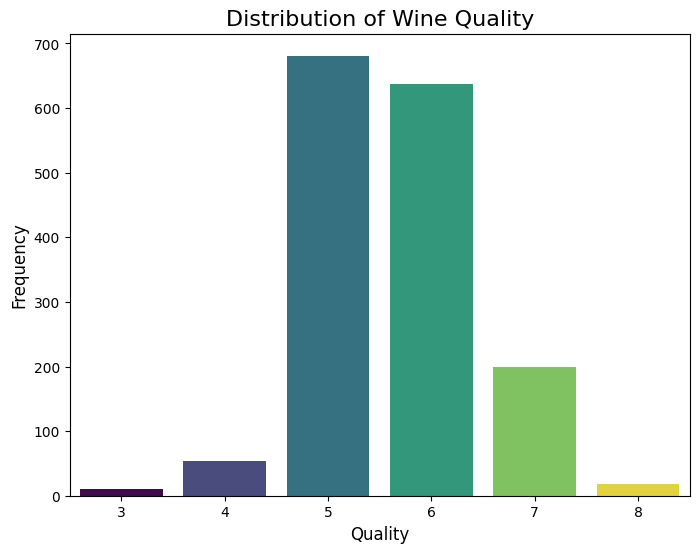


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 175}

Dummy Model Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.42      1.00      0.60       204
           6       0.00      0.00      0.00       192
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00         5

    accuracy                           0.42       480
   macro avg       0.07      0.17      0.10       480
weighted avg       0.18      0.42      0.25       480

Dummy Model Accuracy: 0.425

Baseline Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.72      0.81      0.76       204
           6       0.65      0.68      0.66

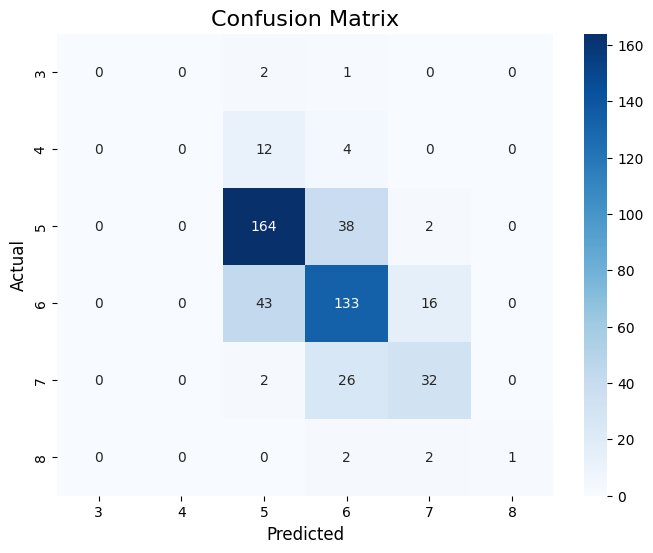


Cross-Validation Accuracy Scores: [0.67410714 0.70535714 0.65625    0.70089286 0.67264574]
Mean CV Accuracy: 0.6819


In [14]:
# Display some data, statistics, and summary info
print(df_wine_red.describe())
print("\n", df_wine_red.head())

# Calculate and Display the frequency of each quality rating
quality_counts = df_wine_red['quality'].value_counts().sort_index()
print("\n", quality_counts)

# Visualize the target variable (quality) distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df_wine_red['quality'], hue=df_wine_red['quality'], legend=False, palette='viridis')
plt.title('Distribution of Wine Quality', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Data Preprocessing
# Features and target split
target = df_wine_red['quality']  # Extract target
features = df_wine_red.drop('quality', axis=1)  # Extract features

# Train-test split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=7, stratify=target)

# Feature scaling (Standard: Mean = 0, Std = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model and tune hyperparameter using Grid Search
rf = RandomForestClassifier(class_weight='balanced', random_state=7)

# Define hyperparameters to tune
grid_tune = {
    'n_estimators': [100, 125, 150, 175, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Grid Search with Cross-Validation (cv=5) and get best model
grid_search = GridSearchCV(estimator=rf, param_grid=grid_tune, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print("\nBest Hyperparameters:", grid_search.best_params_)

# Create a dummy classifier using the 'most_frequent' strategy for baseline model comparison
dummy_model = DummyClassifier(strategy='most_frequent')

# Fit the dummy model, predict on the test set, and get the accuracy score
dummy_model.fit(X_train, y_train)
dummy_pred = dummy_model.predict(X_test)

# Display lassification report for the Dummy model
print("\nDummy Model Classification Report:")
print(classification_report(y_test, dummy_pred, zero_division=0))

# Get and display accuracy score for Dummy model
dummy_accuracy = accuracy_score(y_test, dummy_pred)
print(f"Dummy Model Accuracy: {dummy_accuracy}")

# Evaluate the base rf model
# Predict on the test set
rf.fit(X_train_scaled, y_train)
base_rf_pred = rf.predict(X_test_scaled)

# Display classification report for base Random Forest model
print("\nBaseline Random Forest Classification Report:")
print(classification_report(y_test, base_rf_pred, zero_division=0))

# Get and display accuracy score for base Random Forest model
base_rf_accuracy = accuracy_score(y_test, base_rf_pred)
print(f'Baseline Random Forest Accuracy: {base_rf_accuracy:.4f}')

# Evaluate the tuned  model
# Predict on the test set
rf_pred = best_rf.predict(X_test_scaled)

# Display classification report for tuned Random Forest model
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, zero_division=0))

# Get and display accuracy score for tuned Random Forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Tuned Random Forest Accuracy: {rf_accuracy:.4f}')

# Make and display Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Get and display Cross-Validation Scores
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


With the output from the above code segment, we can derive a fair amount of information about the dataset. First, we see that the dataset is complete, as in, no column has missing data, so nothing needs to be done to clean the dataset. Also, the data is entirely numerical which eases the data preprocessing and improves the usability of the feature data in our model. Additionally, there is a moderate amount of data as there is 1599 entires. However, the quality ratings, which we will be using as the target, is far from balanced in the dataset. As seen in the figure and output above, a majority of the data (about 82%) has a quality rating of 5 or 6, while the remaining quality ratings are either between 3, 4, 7, or 8. This will provide a challenge and likely limitations to our model as the training data for the model will contain very few data points on lower and higher wine qualities, which will make them difficult for the model to learn (generalize) and accurately predict. Thus, we can expect the recall score to be lower as qualities such as 3 and 8 will likely be predicted as a more likely target value. 

Now, given the initial overview of the data, I split the data into testing and training sets, scaled the dataset using the Standard Scalar provided by the sklearn library, and performed a grid search with cross validation provided by the sklearn library to tune some significant hyperparamters for the Random Forest Classifier: n_estimators, max_depth, and min_samples_split. The function determine that the optimal values are {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 175}. Before using the optimal hyperparamters in the Random Forest model, I decided to create a dummy classifier that simply always predicts the most frequent target value, that being a quality rating of 5. As expected, this yeilded a 42.5% accuracy. With the dummy model, I now have a baseline model to compare with the Random Forest classifer. Thus, a successful model that has learned the data should be, at bare minimum, 42.5% accurate. Upon testing the optimized Random Forest model I created, it produced an accuracy of 68.75% with a mean cross validation accuracy of 68.19%. This is not a great accuracy, but it is significantly better than the dummy model (about 26% more accurate). 

With the initial testing done with my model and a dummy classifier, we can further explore methods of improving model accuracy. Specifically, we wish to identify the most important features for preidicting wine quality and remove any noise.

### Feature Analysis: Determining the Best (most important) Features for Predicting Wine Quality ###

Feature Importance Scores:
                  Feature  Importance
10               alcohol    0.134220
1       volatile acidity    0.132165
9              sulphates    0.127130
6   total sulfur dioxide    0.092868
4              chlorides    0.084247
7                density    0.083649
2            citric acid    0.078328
8                     pH    0.076993
0          fixed acidity    0.069208
5    free sulfur dioxide    0.066831
3         residual sugar    0.054362


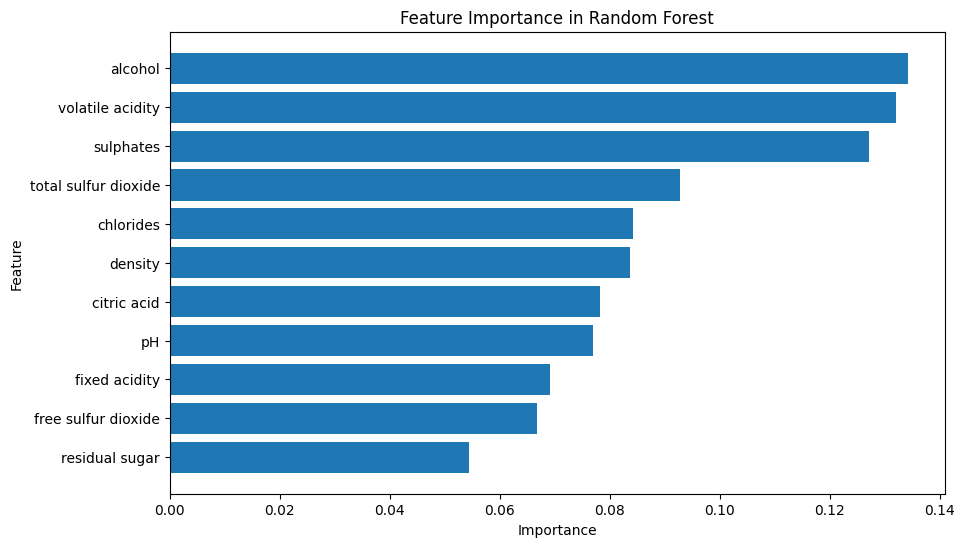


Mutual Information Scores:
                  Feature  MI Score
10               alcohol  0.191033
9              sulphates  0.098005
6   total sulfur dioxide  0.088977
1       volatile acidity  0.082011
2            citric acid  0.065435
7                density  0.058140
4              chlorides  0.041238
8                     pH  0.036805
5    free sulfur dioxide  0.028035
0          fixed acidity  0.027764
3         residual sugar  0.007533


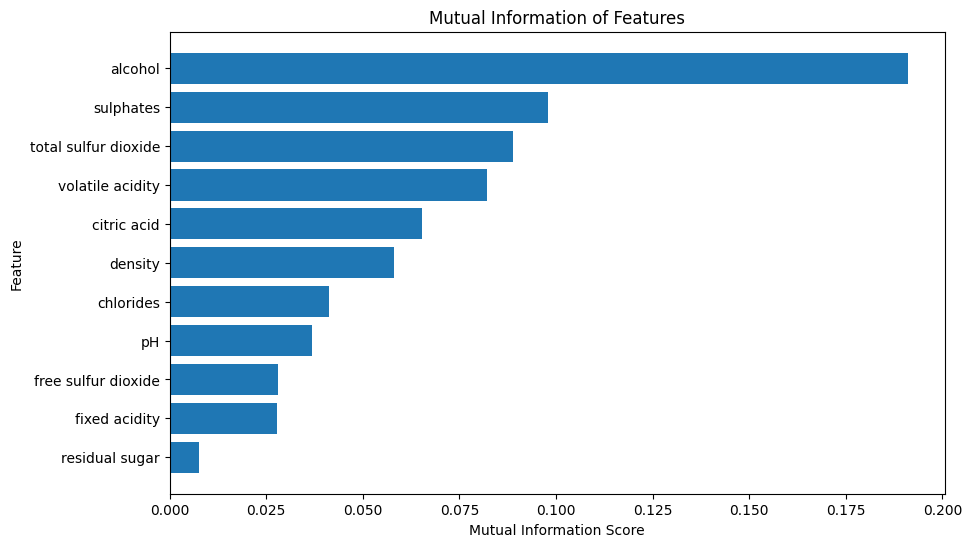


Selected Features by RFE:
                 Feature  Rank
1       volatile acidity     1
7                density     1
6   total sulfur dioxide     1
4              chlorides     1
10               alcohol     1
9              sulphates     1


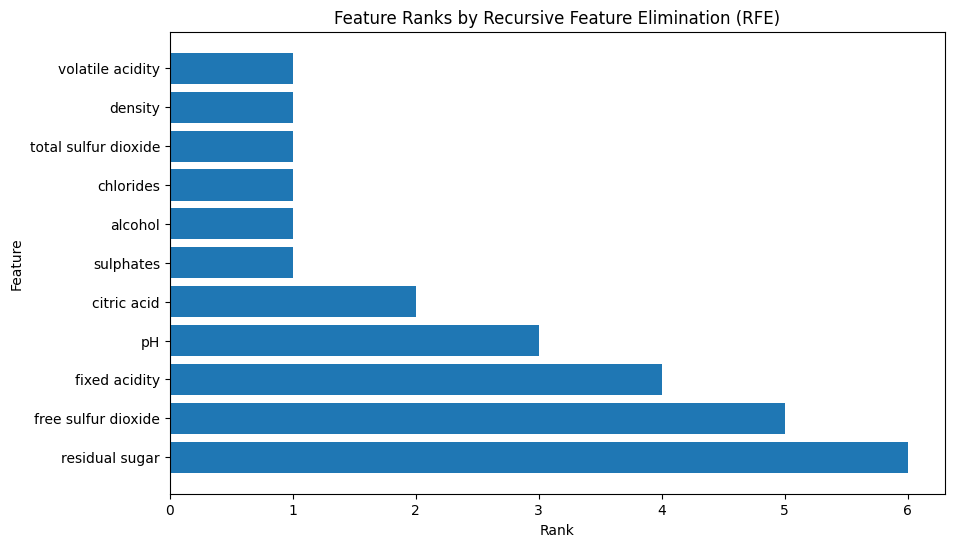


Correlation between each feature and the target variable:
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


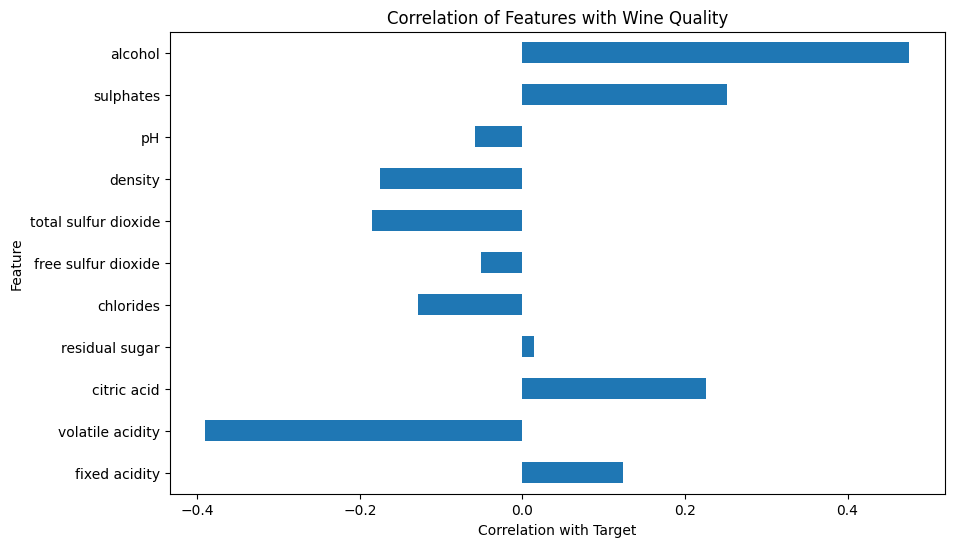

In [15]:
# Get the feature importance scores using the provided measure (based on how much each feature contributes to reducing the prediction error)
importances = best_rf.feature_importances_
feature_names = features.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:\n", feature_importance_df)  # Print feature importance

# Plot the feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Show most important features at the top
plt.show()

# Compute mutual information between each feature and the target
mutual_info_scores = mutual_info_classif(X_train, y_train)

# Create a DataFrame for mutual info
mutual_info_df = pd.DataFrame({
    'Feature': feature_names,
    'MI Score': mutual_info_scores
}).sort_values(by='MI Score', ascending=False)

print("\nMutual Information Scores:\n", mutual_info_df)  # Print the mutual information scores

# Plot the mutual information scores for visualization
plt.figure(figsize=(10,6))
plt.barh(mutual_info_df['Feature'], mutual_info_df['MI Score'])
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information of Features')
plt.gca().invert_yaxis()  # Show most informative features at the top
plt.show()

# Use the Random Forest Classifier to perform Recursive Feature Elimination
rfe = RFE(estimator=best_rf, n_features_to_select=6)  # Select top 6 features

# Fit the RFE model and get feature rankings
rfe.fit(X_train, y_train)
ranking = rfe.ranking_

# Create DataFrame for RFE rankings
rfe_features_df = pd.DataFrame({
    'Feature': feature_names,
    'Rank': ranking
}).sort_values(by='Rank')

# Print the features selected by RFE
print("\nSelected Features by RFE:")
print(rfe_features_df[rfe_features_df['Rank'] == 1])

# Plot feature ranks
plt.figure(figsize=(10,6))
plt.barh(rfe_features_df['Feature'], rfe_features_df['Rank'])
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranks by Recursive Feature Elimination (RFE)')
plt.gca().invert_yaxis()  # Show top ranked features at the top
plt.show()

''' The commented code below was producing the following error: All arrays must be of the same length.
After verifying the length of each data array, X_train & y_train, they appeared to be equal at 1119 '''

# # Create a regularized Logistic Regression model using Lasso (switch to Ridge: penalty='l2')
# lasso_model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear'))

# # Fit the model and get the coefficients
# lasso_model.fit(X_train, y_train)
# coefficients = lasso_model.named_steps['logisticregression'].coef_

# # Create DataFrame for coefficients from the Lasso Logistic Regresseion model
# lasso_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Coefficient': coefficients.flatten()
# }).sort_values(by='Coefficient', ascending=False)

# print(lasso_importance_df)  # Print the coefficients

# # Plot the coefficients
# plt.figure(figsize=(10,6))
# plt.barh(lasso_importance_df['Feature'], lasso_importance_df['Coefficient'])
# plt.xlabel('Coefficient')
# plt.ylabel('Feature')
# plt.title('Feature Importance from Lasso Logistic Regression')
# plt.gca().invert_yaxis()
# plt.show()

# Calculate correlation between each feature and the target variable
correlation_matrix = pd.concat([features, target], axis=1).corr()
target_correlation = correlation_matrix['quality'].drop('quality')

# Print feature correlation with the target
print("\nCorrelation between each feature and the target variable:")
print(target_correlation)

# Plot the correlation
plt.figure(figsize=(10,6))
target_correlation.plot(kind='barh')
plt.xlabel('Correlation with Target')
plt.ylabel('Feature')
plt.title('Correlation of Features with Wine Quality')
plt.show()

With the code segment above, I aim to explore the the importance of the features in the dataset and determine which features are the most beneficial to constructing an accurate model and which features either hurt the model performance or don't contribute anything unique or meaningful (don't notably improve nor harm model accuracy). 

I used four different methods to analyze the features in order to determine which features were the best for the model, specifically focusing on accuracy. First, I used a built in method for the Random Forest classifier that generates feature importance scores based on how much each feature contributes to reducing the prediction error. The output is as follows:
10               alcohol    0.134220
1       volatile acidity    0.132165
9              sulphates    0.127130
6   total sulfur dioxide    0.092868
4              chlorides    0.084247
7                density    0.083649
2            citric acid    0.078328
8                     pH    0.076993
0          fixed acidity    0.069208
5    free sulfur dioxide    0.066831
3         residual sugar    0.054362

Next, I computed the mutual information between each feature and the target using mutual_info_classif from sclearn. The output is as follows:
10               alcohol  0.192047
9              sulphates  0.104967
1       volatile acidity  0.086106
6   total sulfur dioxide  0.078908
7                density  0.065052
2            citric acid  0.047669
0          fixed acidity  0.034456
5    free sulfur dioxide  0.030522
8                     pH  0.021615
4              chlorides  0.019127
3         residual sugar  0.012357

Then, I used the Random Forest Classifier to perform Recursive Feature Elimination in order to obtain the top 6 features based on the RFE function provided by sklearn. The output is as follows:
1       volatile acidity
7                density
6   total sulfur dioxide
4              chlorides
10               alcohol
9              sulphates

Finally, I did a standard relationship testing: correlation. I calculated the correlation between each feature and the target variable. It is important to note here that strong positive and negative correlations are significant for the model. The output is as follows:
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166

Using all of the information gathered about the importance of the features in predicting wine quality with the given dataset, I decided to use the following features ['alcohol', 'total sulfur dioxide', 'sulphates', 'volatile acidity', 'chlorides', 'density']. I concluded that these 6 features were the best features as they were the most agreed upon top rated features among all the feature tests. Thus, although the results of all four methods of feature analysis were not consistent, I was still able to extract the above list of features as each method valued each of the selected features to some extent. Overall, the selected features were favored more with consideration of all four methods than any other features. With this list of features, we can now explore the performance, in regards to accuracy, of the model.

### Feature Testing: What are the Best Features, and Which Features are not Important? ###

Model Performance with Best Selected Features:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.75      0.80      0.77       204
           6       0.66      0.71      0.68       192
           7       0.61      0.55      0.58        60
           8       0.50      0.20      0.29         5

    accuracy                           0.69       480
   macro avg       0.42      0.38      0.39       480
weighted avg       0.66      0.69      0.68       480

Accuracy with Best Selected Features: 0.69375

Cross-Validation Accuracy Scores: [0.64285714 0.67857143 0.63392857 0.69642857 0.68609865]
Mean CV Accuracy: 0.6676


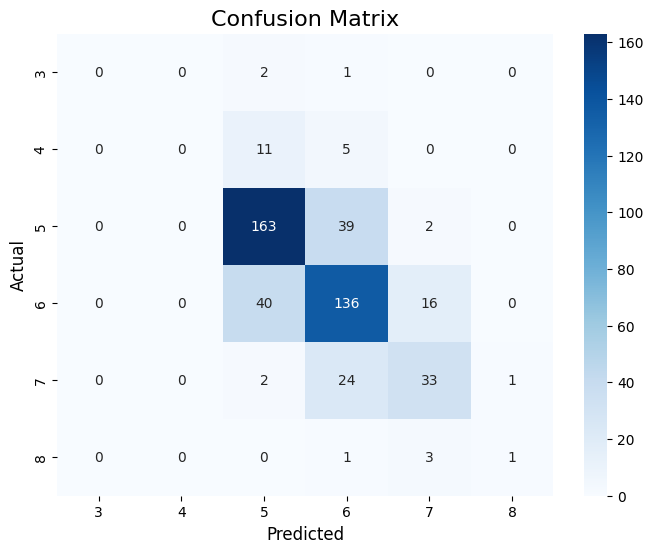


Optimal number of features by RFECV: 9
Selected features:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


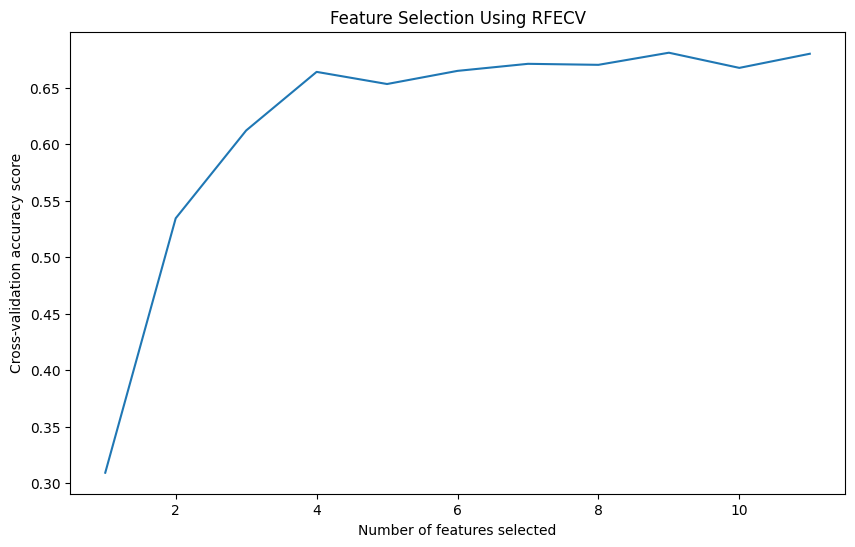

Model Performance with Optimal Selected Features (RFECV):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.71      0.78      0.74       204
           6       0.63      0.66      0.64       192
           7       0.58      0.52      0.55        60
           8       1.00      0.20      0.33         5

    accuracy                           0.66       480
   macro avg       0.49      0.36      0.38       480
weighted avg       0.64      0.66      0.64       480

Accuracy with Optimal Selected Features (RFECV): 0.6604166666666667

Cross-Validation Accuracy Scores: [0.67410714 0.67857143 0.64732143 0.67857143 0.69058296]
Mean CV Accuracy: 0.6738


In [17]:
# Create list of the best features from testing above
best_features = ['alcohol', 'total sulfur dioxide', 'sulphates', 'volatile acidity', 'chlorides', 'density']

# Create a new training/testing set with only the best features
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Scale the data
X_train_best_scaled = scaler.fit_transform(X_train_best)
X_test_best_scaled = scaler.transform(X_test_best)

# Train the model using only the selected features and make predictions on the test set
best_rf.fit(X_train_best_scaled, y_train)
rf_pred_best = best_rf.predict(X_test_best_scaled)

# Display classification report for Random Forest model using selected features
print("Model Performance with Best Selected Features:")
print(classification_report(y_test, rf_pred_best, zero_division=0))

# Get and display accuracy score for Random Forest model using selected features
accuracy_best = accuracy_score(y_test, rf_pred_best)
print(f"Accuracy with Best Selected Features: {accuracy_best}")

# Get and display Cross-Validation Scores
cv_scores = cross_val_score(best_rf, X_train_best_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

# Make and display Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Initialize RFECV (tunes the number of features using cross-validation) using accuracy as the scoring metric
rfecv = RFECV(
    estimator=best_rf,  # Use the tuned rf model constructed above  
    step=1,  # Number of features to remove at each iteration
    cv=StratifiedKFold(5),  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1  # Use all processors
)

# Fit the RFECV model to find the optimal feature combination
rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]

# Display the number of features selected and a list of the selected features
print(f"\nOptimal number of features by RFECV: {rfecv.n_features_}")
print("Selected features:\n", selected_features)

# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation accuracy score")
plt.title("Feature Selection Using RFECV")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Create list of the optimal features identified above with RFECV
optimal_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Create a new training/testing set with only the optimal features
X_train_optimal = X_train[optimal_features]
X_test_optimal = X_test[optimal_features]

# Scale the data
X_train_optimal_scaled = scaler.fit_transform(X_train_optimal)
X_test_optimal_scaled = scaler.transform(X_test_optimal)

# Train the model using only the selected features and make predictions on the test set
best_rf.fit(X_train_optimal_scaled, y_train)
rf_pred_optimal = best_rf.predict(X_test_optimal_scaled)

# Display classification report for Random Forest model using selected features
print("Model Performance with Optimal Selected Features (RFECV):")
print(classification_report(y_test, rf_pred_optimal, zero_division=0))

# Get and display accuracy score for Random Forest model using selected features
accuracy_optimal = accuracy_score(y_test, rf_pred_optimal)
print(f"Accuracy with Optimal Selected Features (RFECV): {accuracy_optimal}")

# Get and display Cross-Validation Scores
cv_scores = cross_val_score(best_rf, X_train_optimal_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


With the above code segment and the corresponding outputs, we can determine that there are features in this dataset that are more important for producing an accurate model, and there are some features that we can consider noise as they either slighly harm the models accuracy or provide no meaningful impact.

Given that our Random Forest model using all features yielded an accuracy of 68.75% with a mean cross validation accuracy of 68.19%, and our Random Forest model using only the best selected features yielded an accuracy of 69.38% with a mean cross validation accuracy of 66.76%, we can conclude that not all features are significant for producing an accurate model. As shown, our model accuracy did not change significantly after removing numerous features; the best feature model was just over 0.5% more accurate with a just under 2% less accurate cross validation score. These accuracy changes did not notably improve as features were removed but that is fine as our question aims to determine importnat features for predicting accuracy and not optimizing / improving the overall accuracy of the model. Thus, given the minor changes in accuracies after removing what appeared to be noise, we can determine with our testing that the following features are significant: ['alcohol', 'total sulfur dioxide', 'sulphates', 'volatile acidity', 'chlorides', 'density']. Note that I further tested this selection of features and determined them to be the best / most important as removing any of the selected features decreased the model accuracy by 1% to 5% and adding in more features either decreased the model accuracy by 1% to 5% or did not change the overall accuracy. Further, since we determined which features were significant, we can also identify the noise features, which are the remaining features that were not selected. These features are the following: ['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'pH']. 

Therfore, with the experiment and analysis, we are able to conclude that ['alcohol', 'total sulfur dioxide', 'sulphates', 'volatile acidity', 'chlorides', 'density'] are significant features for predicting red wine quality and ['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'pH'] are noise features. Although, it is important to note that I do not consider the best features to accurately predict red wine quality as overall the model is not very accurate, although given the tuned Random Forest classifier, these features combined attribute to te most accurate model we were able to construct, which classifies the selected features as significant and the rest as noise.